weights = [7.689014492979993, 5.001308322291809]
average loss: 7.6768256076264665


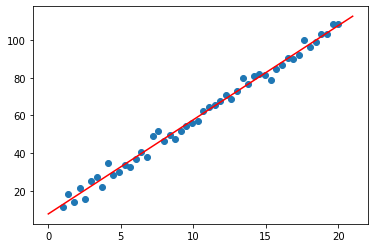

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generateDataSet():
    fr = open('data2d.txt', 'w')
    numOfPoints = 50
    x = np.linspace(1, 20, numOfPoints)
    rd = np.random.randn(numOfPoints) * 3
    y = 5 * x + rd + 8
    for i in range(numOfPoints):
        fr.write(str(x[i]) + '\t' + str(y[i]) + '\n')
    fr.close()

def loadDataSet():
    fr = open('data2d.txt')
    arrayOfLines = fr.readlines()
    dataSet = []
    for line in arrayOfLines:
        curLine = list(map(float, line.strip().split('\t')))
        dataSet.append(curLine)
    fr.close()
    return dataSet

def stand_regression(dataSet):
    dataSet = np.array(dataSet)
    m = len(dataSet)
    X = np.ones((2, m))
    X[1, :] = dataSet[:, 0]
    X = np.matrix(X)
    
    y = dataSet[:, 1]
    y = np.array(y)
    
    XXt = X * X.T
    
    weights = y * X.T * XXt.I
    
    y_hat = weights * X
    error = y_hat - y
    error_ary = np.array(error.tolist()[0])
    error_square_ary = error_ary ** 2
    avg_loss = np.sum(error_square_ary) / m
    
    weights = weights.tolist()[0]
    print('weights =', weights)
    return weights, avg_loss

def plotBestFit(dataSet):
    dataSet = np.array(dataSet)
    ws, avg_loss = stand_regression(dataSet)
    print("average loss:", avg_loss)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataSet[:,0], dataSet[:, 1])
    min_x = np.min(dataSet[:, 0]) - 1
    max_x = np.max(dataSet[:, 0]) + 1
    x = np.linspace(min_x, max_x, len(dataSet))
    y = ws[0] + ws[1] * x
    
    plt.plot(x, y, c='red')
    
if __name__ == "__main__":
    # generateDataSet()
    dataSet = loadDataSet()
    plotBestFit(dataSet)